> **MultiArm Bandit Problem**

The MAB problem is one of the classic problems in reinforcement learning. A MAB is a slot machine where we pull the arm (lever) and get a payout (reward) based on some probability distribution. A single slot machine is called a one-armed bandit and when there are multiple slot machines it is called a MAB or k-armed bandit, where k denotes the number of slot machines.

> 3-armed bandit:

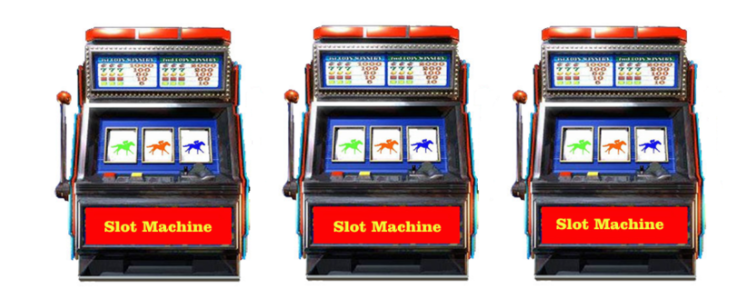

In [1]:
import gym

In [2]:
!git clone https://github.com/JKCooper2/gym-bandits



Cloning into 'gym-bandits'...
remote: Enumerating objects: 73, done.
remote: Total 73 (delta 0), reused 0 (delta 0), pack-reused 73
Unpacking objects: 100% (73/73), done.


In [3]:
%%bash
cd gym-bandits
pip install -e .

Obtaining file:///content/gym-bandits
  Running setup.py develop for gym-bandits


In [7]:
%cd gym-bandits/

/content/gym-bandits


In [8]:
import gym_bandits
import numpy as np

In [9]:
env = gym.make("BanditTwoArmedHighLowFixed-v0")


In [10]:
env.action_space

Discrete(2)

In [11]:
env.observation_space

Discrete(1)

> with arm 1, we win the game 80% of the time and with arm 2, we win the game 20% of the time. Our goal is to find out whether pulling arm 1 or arm 2 makes us win the game most of the time.

In [12]:
env.p_dist 

[0.8, 0.2]

In [13]:
def epsilon_greedy(epsilon):

  if np.random.uniform(0,1) < epsilon:
    return env.action_space.sample()
  else:
    return np.argmax(Q)

In [14]:
count = np.zeros(2)
sum_rewards = np.zeros(2)
Q = np.zeros(2)
num_rounds = 100

In [17]:
for i in range(num_rounds):

  arm = epsilon_greedy(0.5)
  s_, r, done, info =env.step(arm)
  count[arm] += 1
  sum_rewards[arm] += r
  Q[arm] =sum_rewards[arm]/count[arm]


In [18]:
Q

array([0.79375, 0.175  ])

In [20]:
# Now with epsilon 0.2, so more exploitation
count = np.zeros(2)
sum_rewards = np.zeros(2)
Q = np.zeros(2)
num_rounds = 100
for i in range(num_rounds):

  arm = epsilon_greedy(0.5)
  s_, r, done, info =env.step(arm)
  count[arm] += 1
  sum_rewards[arm] += r
  Q[arm] =sum_rewards[arm]/count[arm]


In [21]:
Q

array([0.66666667, 0.25      ])

In [22]:
# Now with epsilon 0.8, so more exploration
count = np.zeros(2)
sum_rewards = np.zeros(2)
Q = np.zeros(2)
num_rounds = 100
for i in range(num_rounds):

  arm = epsilon_greedy(0.5)
  s_, r, done, info =env.step(arm)
  count[arm] += 1
  sum_rewards[arm] += r
  Q[arm] =sum_rewards[arm]/count[arm]

Q

array([0.82089552, 0.24242424])